<h1 style="text-align: center;">Credit Card Fraud Detection</h1>



#### **1. Import Libraries**

In [1]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
from imblearn.over_sampling import SMOTE

import joblib
import os


#### **2️. Load Dataset from ZIP**


In [2]:
import zipfile
import pandas as pd

# Full path to the ZIP file
zip_path = r"C:\Users\prabe\Desktop\credit_card_fraud_detection\data\creditcard.csv.zip"

# Open the ZIP and read the CSV inside without extracting
with zipfile.ZipFile(zip_path, 'r') as z:
    print("Files inside ZIP:", z.namelist())  # verify contents
    # Replace with the exact CSV name inside the ZIP
    csv_name = z.namelist()[0]  # usually the first file in the ZIP
    with z.open(csv_name) as f:
        df = pd.read_csv(f)

# Preview the data
df.head()

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())




Files inside ZIP: ['creditcard.csv']
Shape: (284807, 31)
Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


#### **3. Basic Exploration**


Class
0    284315
1       492
Name: count, dtype: int64


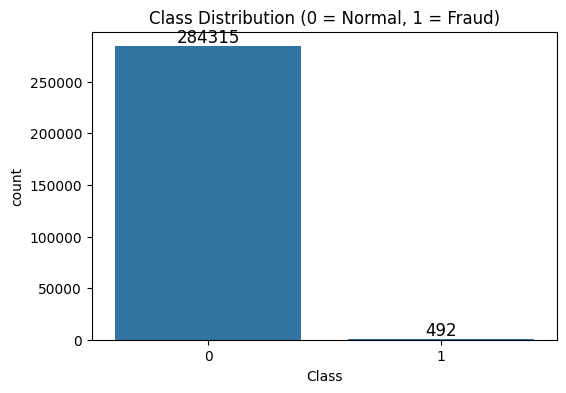

In [3]:
# Class distribution with exact counts
class_counts = df['Class'].value_counts()
print(class_counts)  # prints the exact numbers in console

plt.figure(figsize=(6,4))
ax = sns.countplot(x='Class', data=df)
plt.title("Class Distribution (0 = Normal, 1 = Fraud)")

# Add counts on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width()/2., height),
                ha='center', va='bottom', fontsize=12)

plt.show()


#### **4. Preprocessing**


In [4]:
#### **4. Preprocessing (FIXED – 30 features)**

FEATURE_NAMES = [
    "Time",
    "V1","V2","V3","V4","V5","V6","V7","V8","V9","V10",
    "V11","V12","V13","V14","V15","V16","V17","V18","V19","V20",
    "V21","V22","V23","V24","V25","V26","V27","V28",
    "Amount"
]

# Select features and target
X = df[FEATURE_NAMES]
y = df["Class"]

# Scale ALL features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Before SMOTE:", y.value_counts())

# Apply SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

print("After SMOTE:", pd.Series(y_res).value_counts())

print("Feature count:", X_scaled.shape[1])



Before SMOTE: Class
0    284315
1       492
Name: count, dtype: int64
After SMOTE: Class
0    284315
1    284315
Name: count, dtype: int64
Feature count: 30


#### **5. Train/Test Split**


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42
)


#### **6. Train Random Forest Classifier**

In [6]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

#### **7. Evaluate Model**

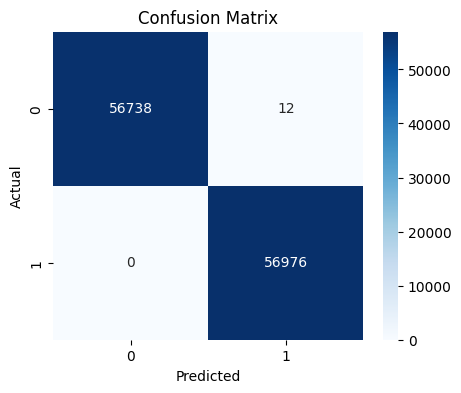

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

ROC-AUC Score: 0.999998993779899


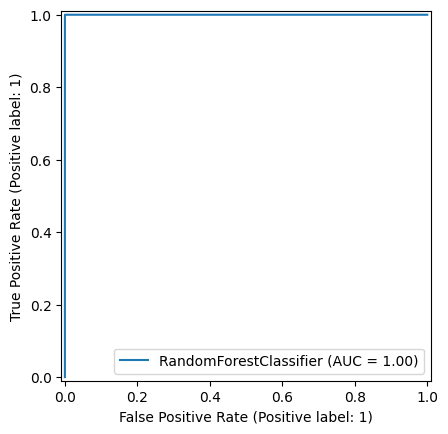

In [7]:
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:,1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC
roc_score = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_score)

RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.show()


#### **8 Save Model & Scaler**

In [9]:
os.makedirs('models', exist_ok=True)
joblib.dump(rf, 'models/random_forest.pkl')
joblib.dump(scaler, 'models/scaler.pkl')
print("Model expects:", rf.n_features_in_)


print("Model and scaler saved to 'models/' folder")


Model expects: 30
Model and scaler saved to 'models/' folder
